<a href="https://colab.research.google.com/github/haminhtien99/oobject_detection_using_UAV/blob/main/test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Train yolov7 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7

/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7


Train model YOLOv7. Сделал более 40 epochs. Но размер датасета - 102 изображений то есть некоторая проблема. mAP > 0.5

In [8]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 24 --data data/mydataset.yaml --weights '/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp/weights/best.pt'

/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=24, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp18', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:60

Тест на изображение в  test после обучения.

In [11]:
%cd /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/
!python detect.py --weights /content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp18/weights/last.pt --source test_images/harlem-0187.jpg

/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/harlem-0187.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/train/exp18/weights/last.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/nati

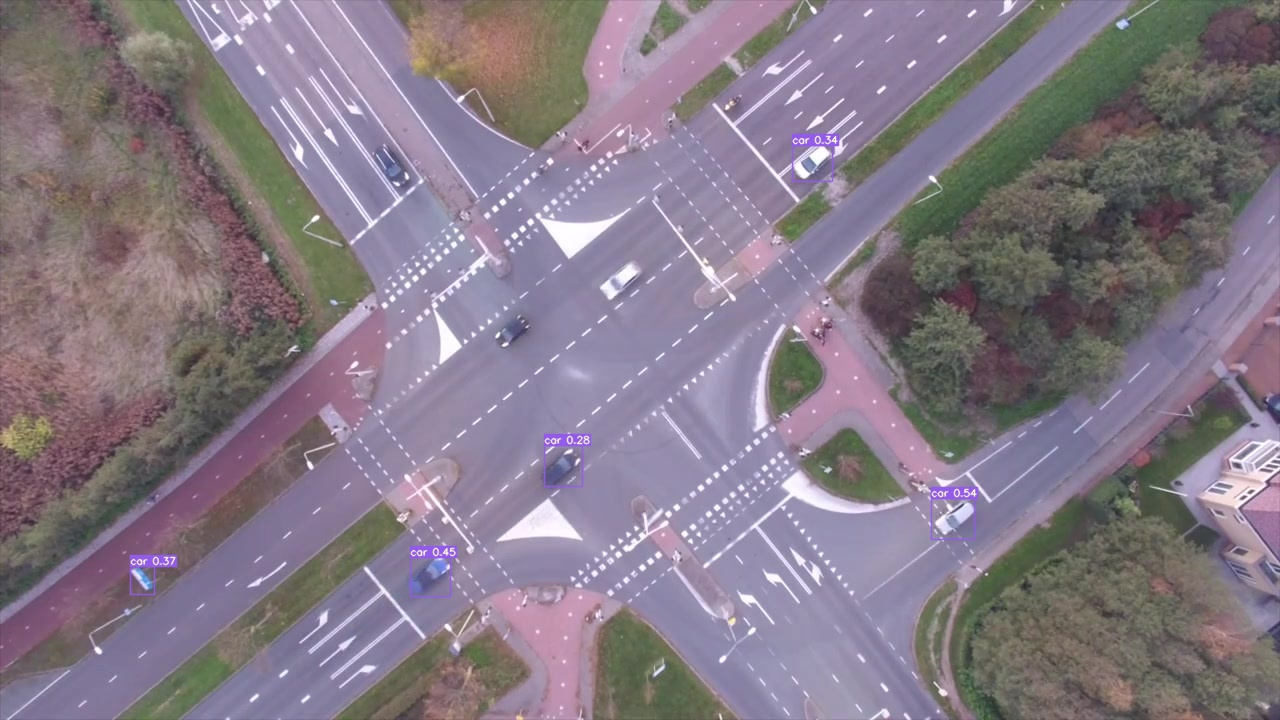

In [13]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/mipt/Nir/yolov7_train/yolov7/runs/detect/exp18/harlem-0187.jpg"))

Результат получил. Но вроде это не очень хорошо. Должно использовать датасет больше